In [16]:
from package import thin_demo
import numpy as np
import cv2 as cv
import bezier
import os
import matplotlib.pyplot as plt
import pandas as pd 



In [22]:
# create a folder for outputs.
path = "./archive/Img/"
name = "img001-001"
extension = ".png"

img = cv.imread(path + name + extension)
contours = thin_demo(img)
contours = contours[0].tolist()
x = []
y = []
newContours = []
for i in contours:
    newContours.append(i[0])
newContours.sort(key=lambda x: x[0])
for i in newContours:
    x.append(i[0])
    y.append(i[1])
nodes = np.asfortranarray([x, y])
print(nodes)


[[275 275 276 ... 596 597 597]
 [446 452 426 ... 342 382 355]]


In [7]:
nodes[0][0]

466

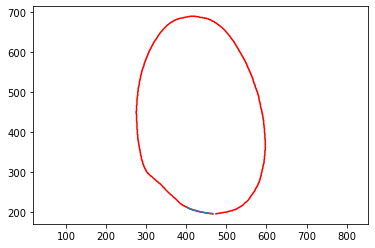

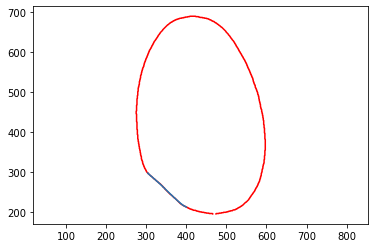

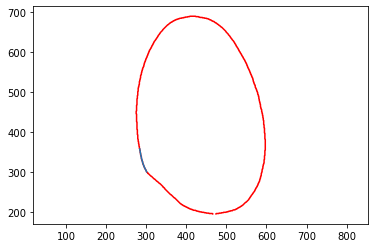

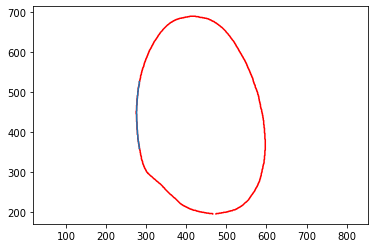

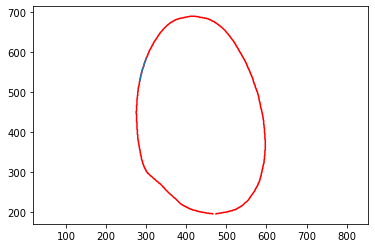

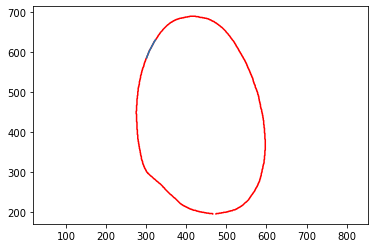

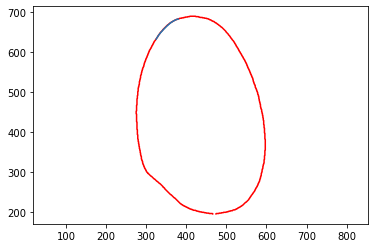

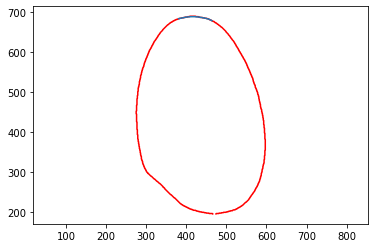

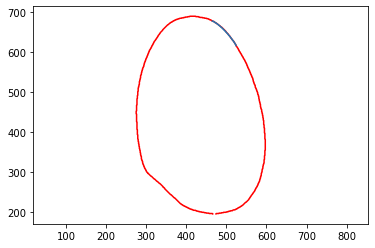

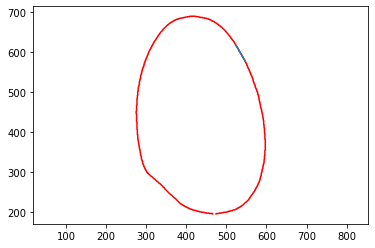

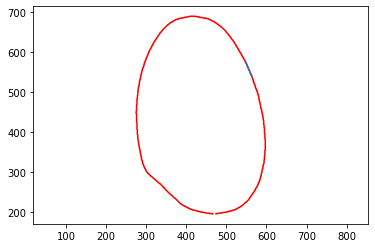

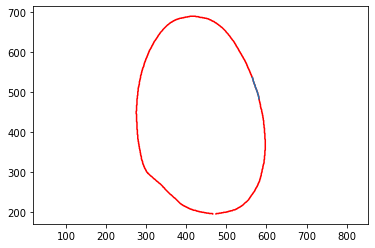

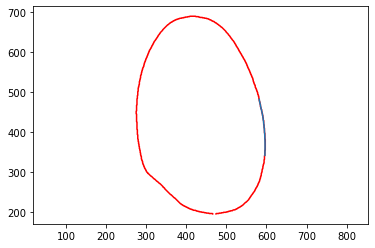

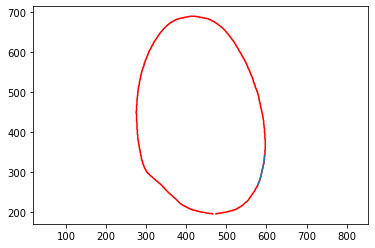

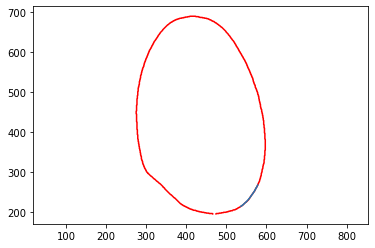

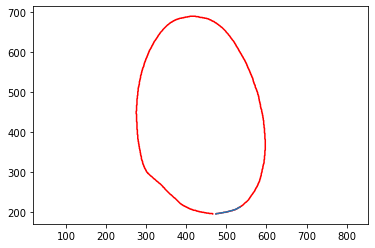

In [2]:
numSegments = 16
intervalNodes = int(len(nodes[0]) / (numSegments)) + 1

j = 1
for i in range(0, len(nodes[0]), intervalNodes):
    # print(f"i = {i}")
    x_new = nodes[0]
    y_new = nodes[1]
    x_segment = nodes[0][i:i+intervalNodes]
    y_segment = nodes[1][i:i+intervalNodes]
    nodes_segment = np.asfortranarray([x_segment, y_segment])
    curve = bezier.Curve(nodes_segment, degree=len(nodes_segment[0])-1)
    x_new[i:i+intervalNodes] = curve.nodes[0]
    y_new[i:i+intervalNodes] = curve.nodes[1]
    nodes_new = [x_new, y_new]
    pd.DataFrame([x_new, y_new]).to_csv('./new_images/' + name + '-{0:03}'.format(j) + ".csv")
    j = j + 1

    # plot images
    fig, axs = plt.subplots(1, 1)
    axs.axis('equal')
    plt.plot(x, y, '-r') # original image
    # plt.plot(nodes_new[0][0:i], nodes_new[1][0:i], '-b') # unchanged segment in new image
    # plt.plot(nodes_new[0][i:i+intervalNodes], nodes_new[1][i:i+intervalNodes], '.r') # new segment in new image (option 1)
    curve.plot(len(nodes_segment[0]), ax=axs) # new segment in new image (option 2)
    # plt.plot(nodes_new[0][i+intervalNodes:len(nodes[0])], nodes_new[1][i+intervalNodes:len(nodes[0])], '-b') # unchanged segment in new image

In [31]:
import random

print(random.randint(0,3))

3
